# Titanic data challenge

The goal is to predict whether or not a passenger survived based on attributes such as their age, sex, passenger class, where they embarked and so on. 

First, login to [Kaggle competition](https://www.kaggle.com/c/titanic) to download train.csv and test.csv. Save them to the titanic directory.

We first split the training data into training and validation sets. You can use cross validation as well.

Train the following three classifers:
<ul>
<li> Logistic regression </li>
<li> SVM </li>    
<li> KNN classifier </li>
</ul>

Report the features of each model, the confusion matrix, classification summary, and AUC.

Select the best model and use it to predict the test set. Submit your predictions in the test set.

In [1]:
import pandas as pd
import numpy as np

In [2]:
%cd /Users/Cloris/Downloads

/Users/Cloris/Downloads


In [3]:
titanic = pd.read_csv('train.csv', header = 0, dtype={'Age': np.float64})
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


# Performing Data Cleaning and Analysis

1. Understanding meaning of each column:
Data Dictionary: 
Variable Description

Survived - Survived (1) or died (0)
Pclass - Passenger’s class (1 = 1st, 2 = 2nd, 3 = 3rd)
Name - Passenger’s name
Sex - Passenger’s sex
Age - Passenger’s age
SibSp - Number of siblings/spouses aboard
Parch - Number of parents/children aboard (Some children travelled only with a nanny, therefore parch=0 for them.)
Ticket - Ticket number
Fare - Fare
Cabin - Cabin
Embarked - Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

2. Analysing which columns are completely useless in predicting the survival and deleting them
Note - Don't just delete the columns because you are not finding it useful. Or focus is not on deleting the columns. Our focus is on analysing how each column is affecting the result or the prediction and in accordance with that deciding whether to keep the column or to delete the column or fill the null values of the column by some values and if yes, then what values.

In [4]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
#Name column can never decide survival of a person, hence we can safely delete it
del titanic["Name"]
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
del titanic["Ticket"]
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,71.2833,C85,C
2,3,1,3,female,26.0,0,0,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,53.1000,C123,S
4,5,0,3,male,35.0,0,0,8.0500,NaN,S


In [7]:
del titanic["Fare"]
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked
0,1,0,3,male,22.0,1,0,NaN,S
1,2,1,1,female,38.0,1,0,C85,C
2,3,1,3,female,26.0,0,0,NaN,S
3,4,1,1,female,35.0,1,0,C123,S
4,5,0,3,male,35.0,0,0,NaN,S


In [8]:
del titanic['Cabin']
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,male,22.0,1,0,S
1,2,1,1,female,38.0,1,0,C
2,3,1,3,female,26.0,0,0,S
3,4,1,1,female,35.0,1,0,S
4,5,0,3,male,35.0,0,0,S


In [9]:
# Changing Value for "Male, Female" string values to numeric values , male=1 and female=2
def getNumber(str):
    if str=="male":
        return 1
    else:
        return 2
titanic["Gender"]=titanic["Sex"].apply(getNumber)
#We have created a new column called "Gender" and 
#filling it with values 1,2 based on the values of sex column
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Gender
0,1,0,3,male,22.0,1,0,S,1
1,2,1,1,female,38.0,1,0,C,2
2,3,1,3,female,26.0,0,0,S,2
3,4,1,1,female,35.0,1,0,S,2
4,5,0,3,male,35.0,0,0,S,1


In [10]:
#Deleting Sex column, since no use of it now
del titanic["Sex"]
titanic.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Embarked,Gender
0,1,0,3,22.0,1,0,S,1
1,2,1,1,38.0,1,0,C,2
2,3,1,3,26.0,0,0,S,2
3,4,1,1,35.0,1,0,S,2
4,5,0,3,35.0,0,0,S,1


In [11]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Age            177
SibSp            0
Parch            0
Embarked         2
Gender           0
dtype: int64

### Fill the null values of the Age column. Fill mean Survived age(mean age of the survived people) in the column where the person has survived and mean not Survived age (mean age of the people who have not survived) in the column where person has not survived###


In [12]:
meanS= titanic[titanic.Survived==1].Age.mean()
meanS

28.343689655172415

### Creating a new "Age" column , filling values in it with a condition if goes True then given values (here meanS) is put in place of last values else nothing happens, simply the values are copied from the "Age" column of the dataset###

In [13]:
titanic["age"]=np.where(pd.isnull(titanic.Age) & titanic["Survived"]==1  ,meanS, titanic["Age"])
titanic.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Embarked,Gender,age
0,1,0,3,22.0,1,0,S,1,22.0
1,2,1,1,38.0,1,0,C,2,38.0
2,3,1,3,26.0,0,0,S,2,26.0
3,4,1,1,35.0,1,0,S,2,35.0
4,5,0,3,35.0,0,0,S,1,35.0


In [14]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Age            177
SibSp            0
Parch            0
Embarked         2
Gender           0
age            125
dtype: int64

In [15]:
# Finding the mean age of "Not Survived" people
meanNS=titanic[titanic.Survived==0].Age.mean()
meanNS

30.62617924528302

In [16]:
titanic.age.fillna(meanNS,inplace=True)
titanic.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Embarked,Gender,age
0,1,0,3,22.0,1,0,S,1,22.0
1,2,1,1,38.0,1,0,C,2,38.0
2,3,1,3,26.0,0,0,S,2,26.0
3,4,1,1,35.0,1,0,S,2,35.0
4,5,0,3,35.0,0,0,S,1,35.0


In [17]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Age            177
SibSp            0
Parch            0
Embarked         2
Gender           0
age              0
dtype: int64

In [18]:
del titanic['Age']
titanic.head()

,PassengerId,Survived,Pclass,SibSp,Parch,Embarked,Gender,age
0,1,0,3,1,0,S,1,22.0
1,2,1,1,1,0,C,2,38.0
2,3,1,3,0,0,S,2,26.0
3,4,1,1,1,0,S,2,35.0
4,5,0,3,0,0,S,1,35.0


### We want to check if "Embarked" column is is important for analysis or not, that is whether survival of the person depends on the Embarked column value or not###


In [19]:
# Finding the number of people who have survived 
# given that they have embarked or boarded from a particular port

survivedQ = titanic[titanic.Embarked == 'Q'][titanic.Survived == 1].shape[0]
survivedC = titanic[titanic.Embarked == 'C'][titanic.Survived == 1].shape[0]
survivedS = titanic[titanic.Embarked == 'S'][titanic.Survived == 1].shape[0]
print(survivedQ)
print(survivedC)
print(survivedS)

30
93
217


/var/folders/k6/4rd3w0v91_74v64t4lpg4ysr0000gn/T/ipykernel_66136/3300902897.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  survivedQ = titanic[titanic.Embarked == 'Q'][titanic.Survived == 1].shape[0]
/var/folders/k6/4rd3w0v91_74v64t4lpg4ysr0000gn/T/ipykernel_66136/3300902897.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  survivedC = titanic[titanic.Embarked == 'C'][titanic.Survived == 1].shape[0]
/var/folders/k6/4rd3w0v91_74v64t4lpg4ysr0000gn/T/ipykernel_66136/3300902897.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  survivedS = titanic[titanic.Embarked == 'S'][titanic.Survived == 1].shape[0]


In [20]:
survivedQ = titanic[titanic.Embarked == 'Q'][titanic.Survived == 0].shape[0]
survivedC = titanic[titanic.Embarked == 'C'][titanic.Survived == 0].shape[0]
survivedS = titanic[titanic.Embarked == 'S'][titanic.Survived == 0].shape[0]
print(survivedQ)
print(survivedC)
print(survivedS)

47
75
427


/var/folders/k6/4rd3w0v91_74v64t4lpg4ysr0000gn/T/ipykernel_66136/3240960939.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  survivedQ = titanic[titanic.Embarked == 'Q'][titanic.Survived == 0].shape[0]
/var/folders/k6/4rd3w0v91_74v64t4lpg4ysr0000gn/T/ipykernel_66136/3240960939.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  survivedC = titanic[titanic.Embarked == 'C'][titanic.Survived == 0].shape[0]
/var/folders/k6/4rd3w0v91_74v64t4lpg4ysr0000gn/T/ipykernel_66136/3240960939.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  survivedS = titanic[titanic.Embarked == 'S'][titanic.Survived == 0].shape[0]


As there are significant changes in the survival rate based on which port the passengers aboard the ship. 
We cannot delete the whole embarked column(It is useful). 
Now the Embarked column has some null values in it and hence we can safely say that deleting some rows from total rows will not affect the result. So rather than trying to fill those null values with some vales. We can simply remove them.

In [21]:
titanic.dropna(inplace=True)
titanic.head()

,PassengerId,Survived,Pclass,SibSp,Parch,Embarked,Gender,age
0,1,0,3,1,0,S,1,22.0
1,2,1,1,1,0,C,2,38.0
2,3,1,3,0,0,S,2,26.0
3,4,1,1,1,0,S,2,35.0
4,5,0,3,0,0,S,1,35.0


In [22]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
SibSp          0
Parch          0
Embarked       0
Gender         0
age            0
dtype: int64

In [23]:
#Renaming "age" and "gender" columns
titanic.rename(columns={'age':'Age'}, inplace=True)
titanic.head()

,PassengerId,Survived,Pclass,SibSp,Parch,Embarked,Gender,Age
0,1,0,3,1,0,S,1,22.0
1,2,1,1,1,0,C,2,38.0
2,3,1,3,0,0,S,2,26.0
3,4,1,1,1,0,S,2,35.0
4,5,0,3,0,0,S,1,35.0


In [24]:
titanic.rename(columns={'Gender':'Sex'}, inplace=True)
titanic.head()

,PassengerId,Survived,Pclass,SibSp,Parch,Embarked,Sex,Age
0,1,0,3,1,0,S,1,22.0
1,2,1,1,1,0,C,2,38.0
2,3,1,3,0,0,S,2,26.0
3,4,1,1,1,0,S,2,35.0
4,5,0,3,0,0,S,1,35.0


In [25]:
def getS(str):
    if str=="S":
        return 1
    else:
        return 0
titanic["S"]=titanic["Embarked"].apply(getS)
def getQ(str):
    if str=="Q":
        return 1
    else:
        return 0
titanic["Q"]=titanic["Embarked"].apply(getQ)
def getC(str):
    if str=="C":
        return 1
    else:
        return 0
titanic["C"]=titanic["Embarked"].apply(getC)
titanic.head()

,PassengerId,Survived,Pclass,SibSp,Parch,Embarked,Sex,Age,S,Q,C
0,1,0,3,1,0,S,1,22.0,1,0,0
1,2,1,1,1,0,C,2,38.0,0,0,1
2,3,1,3,0,0,S,2,26.0,1,0,0
3,4,1,1,1,0,S,2,35.0,1,0,0
4,5,0,3,0,0,S,1,35.0,1,0,0


In [26]:
del titanic['Embarked']
titanic.head()

,PassengerId,Survived,Pclass,SibSp,Parch,Sex,Age,S,Q,C
0,1,0,3,1,0,1,22.0,1,0,0
1,2,1,1,1,0,2,38.0,0,0,1
2,3,1,3,0,0,2,26.0,1,0,0
3,4,1,1,1,0,2,35.0,1,0,0
4,5,0,3,0,0,1,35.0,1,0,0


577
312


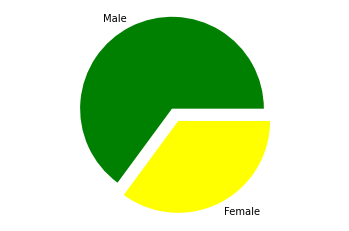

In [27]:
#Drawing a pie chart for number of males and females aboard
import matplotlib.pyplot as plt
from matplotlib import style

males = (titanic['Sex'] == 1).sum() 
#Summing up all the values of column gender with a 
#condition for male and similary for females
females = (titanic['Sex'] == 2).sum()
print(males)
print(females)
p = [males, females]
plt.pie(p,    #giving array
       labels = ['Male', 'Female'], #Correspndingly giving labels
       colors = ['green', 'yellow'],   # Corresponding colors
       explode = (0.15, 0),    #How much the gap should me there between the pies
       startangle = 0)  #what start angle should be given
plt.axis('equal') 
plt.show()

In [28]:
# More Precise Pie Chart
MaleS=titanic[titanic.Sex==1][titanic.Survived==1].shape[0]
print(MaleS)
MaleN=titanic[titanic.Sex==1][titanic.Survived==0].shape[0]
print(MaleN)
FemaleS=titanic[titanic.Sex==2][titanic.Survived==1].shape[0]
print(FemaleS)
FemaleN=titanic[titanic.Sex==2][titanic.Survived==0].shape[0]
print(FemaleN)

109
468
231
81


/var/folders/k6/4rd3w0v91_74v64t4lpg4ysr0000gn/T/ipykernel_66136/3105620411.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MaleS=titanic[titanic.Sex==1][titanic.Survived==1].shape[0]
/var/folders/k6/4rd3w0v91_74v64t4lpg4ysr0000gn/T/ipykernel_66136/3105620411.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MaleN=titanic[titanic.Sex==1][titanic.Survived==0].shape[0]
/var/folders/k6/4rd3w0v91_74v64t4lpg4ysr0000gn/T/ipykernel_66136/3105620411.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  FemaleS=titanic[titanic.Sex==2][titanic.Survived==1].shape[0]
/var/folders/k6/4rd3w0v91_74v64t4lpg4ysr0000gn/T/ipykernel_66136/3105620411.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  FemaleN=titanic[titanic.Sex==2][titanic.Survived==0].shape[0]


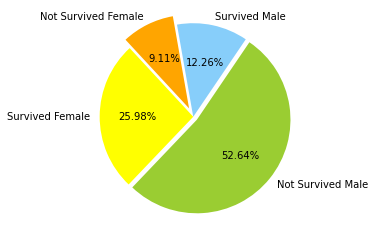

In [29]:
chart=[MaleS,MaleN,FemaleS,FemaleN]
colors=['lightskyblue','yellowgreen','Yellow','Orange']
labels=["Survived Male","Not Survived Male","Survived Female","Not Survived Female"]
explode=[0,0.05,0,0.1]
plt.pie(chart,labels=labels,colors=colors,explode=explode,startangle=100,counterclock=False,autopct="%.2f%%")
plt.axis("equal")
plt.show()

In [30]:
test_data = pd.read_csv("test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


The data is already split into a training set and a test set. We need to preprocess the test data in the same step as we have done for the training data.

In [31]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [32]:
#Name column can never decide survival of a person, hence we can safely delete it
del test_data["Name"]
del test_data["Ticket"]
del test_data["Fare"]
del test_data['Cabin']
test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked
0,892,3,male,34.5,0,0,Q
1,893,3,female,47.0,1,0,S
2,894,2,male,62.0,0,0,Q
3,895,3,male,27.0,0,0,S
4,896,3,female,22.0,1,1,S


In [33]:
# Changing Value for "Male, Female" string values to numeric values , male=1 and female=2
def getNumber(str):
    if str=="male":
        return 1
    else:
        return 2
test_data["Gender"]=test_data["Sex"].apply(getNumber)
#We have created a new column called "Gender" and 
#filling it with values 1,2 based on the values of sex column
test_data.head()
#Deleting Sex column, since no use of it now
del test_data["Sex"]
test_data.head()

,PassengerId,Pclass,Age,SibSp,Parch,Embarked,Gender
0,892,3,34.5,0,0,Q,1
1,893,3,47.0,1,0,S,2
2,894,2,62.0,0,0,Q,1
3,895,3,27.0,0,0,S,1
4,896,3,22.0,1,1,S,2


In [34]:
test_data.isnull().sum()

PassengerId     0
Pclass          0
Age            86
SibSp           0
Parch           0
Embarked        0
Gender          0
dtype: int64

In [35]:
# fill age
meanAge=test_data.Age.mean()
test_data.Age.fillna(meanAge,inplace=True)

In [36]:
test_data.head()

,PassengerId,Pclass,Age,SibSp,Parch,Embarked,Gender
0,892,3,34.5,0,0,Q,1
1,893,3,47.0,1,0,S,2
2,894,2,62.0,0,0,Q,1
3,895,3,27.0,0,0,S,1
4,896,3,22.0,1,1,S,2


In [37]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
SibSp          0
Parch          0
Sex            0
Age            0
S              0
Q              0
C              0
dtype: int64

In [38]:
test_data.rename(columns={'Gender':'Sex'}, inplace=True)
def getS(str):
    if str=="S":
        return 1
    else:
        return 0
test_data["S"]=test_data["Embarked"].apply(getS)
def getQ(str):
    if str=="Q":
        return 1
    else:
        return 0
test_data["Q"]=test_data["Embarked"].apply(getQ)
def getC(str):
    if str=="C":
        return 1
    else:
        return 0
test_data["C"]=test_data["Embarked"].apply(getC)
del test_data['Embarked']

In [39]:
test_data.head()

,PassengerId,Pclass,Age,SibSp,Parch,Sex,S,Q,C
0,892,3,34.5,0,0,1,0,1,0
1,893,3,47.0,1,0,2,1,0,0
2,894,2,62.0,0,0,1,0,1,0
3,895,3,27.0,0,0,1,1,0,0
4,896,3,22.0,1,1,2,1,0,0


#### Split the data into training and validation sets

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X = titanic[['PassengerId','Pclass','Age','SibSp','Parch','Sex','S','Q','C']]
y = titanic["Survived"]

In [42]:
X_train, X_validate, y_train, y_validate = train_test_split(X,y,test_size = 0.3, random_state = 101)

#### Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression
logmodel= LogisticRegression()
logmodel.fit(X_train,y_train)

/Users/Cloris/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [44]:
logpredictions = logmodel.predict(X_validate)

Evaluation: Classification summary, Confusion Metric and AUC

In [45]:
from sklearn.metrics import classification_report
print(classification_report(y_validate,logpredictions))
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_validate,logpredictions))
tn, fp, fn, tp = confusion_matrix(y_validate,logpredictions).ravel()
(tn, fp, fn, tp)
from sklearn.metrics import roc_auc_score
print('AUC-ROC score:', roc_auc_score(y_validate,logpredictions))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       163
           1       0.84      0.70      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.81      0.82       267
weighted avg       0.83      0.83      0.83       267

[[149  14]
 [ 31  73]]
AUC-ROC score: 0.808016753185465


#### SVM

In [46]:
from sklearn.svm import SVC

In [47]:
svc_model = SVC()

In [48]:
svc_model.fit(X_train,y_train)

SVC()

In [49]:
SVMpredictions = svc_model.predict(X_validate)

Evaluation: Classification summary, Confusion Metric and AUC

In [50]:
print(classification_report(y_validate,SVMpredictions))
print(confusion_matrix(y_validate,SVMpredictions))
print('AUC-ROC score:', roc_auc_score(y_validate,SVMpredictions))

              precision    recall  f1-score   support

           0       0.61      1.00      0.76       163
           1       0.00      0.00      0.00       104

    accuracy                           0.61       267
   macro avg       0.31      0.50      0.38       267
weighted avg       0.37      0.61      0.46       267

[[163   0]
 [104   0]]
AUC-ROC score: 0.5


/Users/Cloris/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Cloris/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Cloris/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### KNN

#### Standardize the variables

In [51]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [52]:
scaled_festures = scaler.transform(X)
df_feat = pd.DataFrame(scaled_festures,columns = ['PassengerId','Pclass','Age','SibSp','Parch','Sex','S','Q','C'])
df_feat.head()

,PassengerId,Pclass,Age,SibSp,Parch,Sex,S,Q,C
0,-1.732505,0.825209,-0.594028,0.431350,-0.474326,-0.735342,0.616794,-0.307941,-0.482711
1,-1.728611,-1.572211,0.639592,0.431350,-0.474326,1.359911,-1.621287,-0.307941,2.071634
2,-1.724718,0.825209,-0.285623,-0.475199,-0.474326,1.359911,0.616794,-0.307941,-0.482711
3,-1.720825,-1.572211,0.408289,0.431350,-0.474326,1.359911,0.616794,-0.307941,-0.482711
4,-1.716931,0.825209,0.408289,-0.475199,-0.474326,-0.735342,0.616794,-0.307941,-0.482711


#### Train, Validation split

In [53]:
Xk_train, Xk_validate, yk_train,yk_validate = train_test_split(scaled_festures, 
                                                           titanic['Survived'],test_size = 0.3, random_state = 101)

In [54]:
from sklearn.neighbors import KNeighborsClassifier

In [55]:
knn = KNeighborsClassifier(n_neighbors = 1)

In [56]:
knn.fit(Xk_train,yk_train)

KNeighborsClassifier(n_neighbors=1)

In [57]:
KNNpredictions = knn.predict(Xk_validate)

Evaluation: Classification summary, Confusion Metric and AUC

In [58]:
print(classification_report(yk_validate,KNNpredictions))
print(confusion_matrix(yk_validate,KNNpredictions))
print('AUC-ROC score:', roc_auc_score(yk_validate,KNNpredictions))

              precision    recall  f1-score   support

           0       0.78      0.87      0.82       163
           1       0.75      0.62      0.68       104

    accuracy                           0.77       267
   macro avg       0.77      0.75      0.75       267
weighted avg       0.77      0.77      0.77       267

[[141  22]
 [ 39  65]]
AUC-ROC score: 0.7450153374233129


#### From the evaluation, we would choose logistic regression model to predict the survival for test data

In [59]:
predictions = logmodel.predict(test_data)

In [60]:
test_data['Precitions'] = predictions

In [61]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Sex,S,Q,C,Precitions
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,1.363636,0.645933,0.110048,0.244019,0.389952
std,120.810458,0.841838,12.634534,0.896760,0.981429,0.481622,0.478803,0.313324,0.430019,0.488324
min,892.000000,1.000000,0.170000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,23.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1100.500000,3.000000,30.272590,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1204.750000,3.000000,35.750000,1.000000,0.000000,2.000000,1.000000,0.000000,0.000000,1.000000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,2.000000,1.000000,1.000000,1.000000,1.000000
